In [65]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Display the data table for preview

city_df.head()
ride_df.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [66]:

# Combine the data into a single dataset

#outer merge to match city data with ride data - preserve all lines 

all_data = pd.merge(city_df, ride_df, on="city", how="outer")
all_data.head()


#Get unique types of cities
# all_data["type"].unique()



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850



## Bubble Plot of Ride Sharing Data

In [67]:
# Obtain the x and y coordinates for each of the three city types

#Groupby to get average fare (x-axis) and # of drivers (y-axis)

bycity_mean = all_data.groupby(["city", "type"]).mean()

allcity_drivers = bycity_mean["driver_count"].value_counts()
allcity_drivers.head()

# # get # of rides per city through groupby and counting individual ride ids

bycity_rides = all_data.groupby(["city"]).count()["ride_id"]


x_axis = bycity_mean["fare"]

y_axis = bycity_rides

# labels = bycity_mean["type"]




<IPython.core.display.Javascript object>


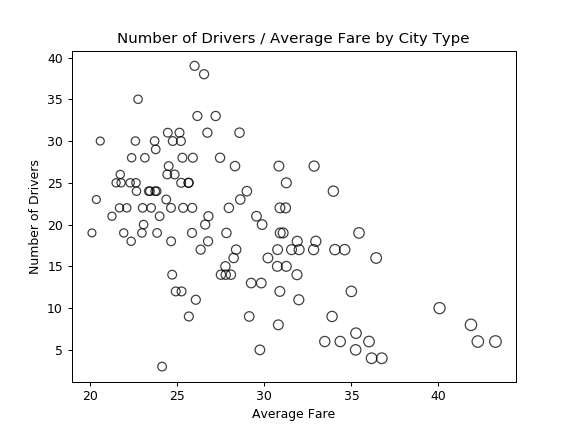

Text(0.5,0,'Average Fare')

In [70]:

# for x in labels:

plt.scatter(x_axis, y_axis, marker="o", facecolors="", edgecolors="black",
            s=(x_axis)*2, alpha=0.75)       

plt.title("Number of Drivers / Average Fare by City Type")
plt.ylabel("Number of Drivers")
plt.xlabel("Average Fare")


# groups = df.groupby('label')


# for name, group in groups:
#     plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
# ax.legend(numpoints=1, loc='upper left')

                
# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [62]:
# Show plot
plt.show()

## Total Fares by City Type

<IPython.core.display.Javascript object>


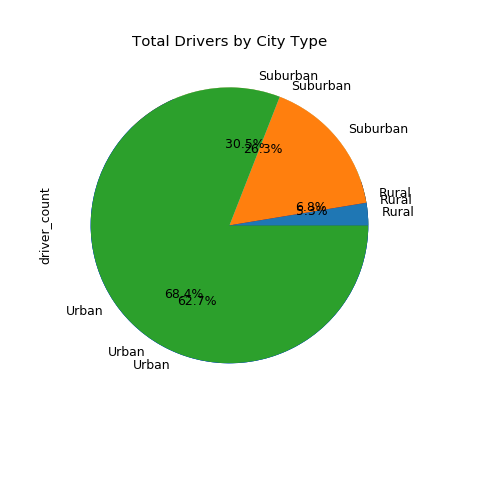

In [55]:
# Calculate Type Percents

bytype_fare = all_data.groupby(["type"]).sum()["fare"]

bytype_faretotals = bytype_fare.sum()

pie_fares =  bytype_fare / bytype_faretotals * 100
pie_fares


# # Build Pie Chart

colors = ["limegreen", "orange", "dodgerblue"]

fares_pie = pie_fares.plot.pie(figsize = (5,5), colors = colors, autopct="%1.1f%%")
plt.title("Total Fares by City Type")
# # Save Figure

plt.savefig("total_fares_by_city_type.png") 



In [12]:
# Show Figure
plt.show()

## Total Rides by City Type

In [56]:
# Calculate Ride Percents

bytype_rides = all_data.groupby(["type"]).count()["ride_id"]

bytype_totals = bytype_rides.sum()

pie_type =  bytype_rides / bytype_totals * 100

colors = ["limegreen", "orange", "dodgerblue"]


# # Build Pie Chart

plot = pie_type.plot.pie(figsize = (5, 5),  colors = colors, autopct="%1.1f%%")
plt.title("Total Rides by City Type")

plt.savefig("total_rides_by_city_type.png") 

# Save Figure



In [47]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [57]:
# Calculate Driver Percents

bycity_drivers = all_data.drop_duplicates("city")

bytype_drivers = bycity_drivers.groupby(["type"]).sum()["driver_count"]

alltype_drivers = bytype_drivers.sum()

pie_drivers =  bytype_drivers / alltype_drivers * 100
pie_drivers

colors = ["limegreen", "orange", "dodgerblue"]



drivers_pie = pie_drivers.plot.pie(figsize = (5, 5))
plt.title("Total Drivers by City Type")

# # # Save Figure

plt.savefig("total_drivers_by_city_type.png") 




In [ ]:
# Show Figure
plt.show()